In [55]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [56]:
# Reading CSVs

df1=pd.read_csv("1980.csv")
df2=pd.read_csv("1985.csv")

In [57]:
# Function to get required data in arrays

def getDataFromDataframe(df):
    
    # Making empty Arrays
    population = np.array([])
    gdp = np.array([])
    
    # Sorting dataframe according to GDP
    sorted_df = df.sort_values(["Real GDP(in milllion $)"], ignore_index=True)
    
    # Loop to add relevant data into arrays
    for i in range(sorted_df['Population (in millions)'].count()):
        population = np.append(population, sorted_df['Population (in millions)'][i])        
        gdp = np.append(gdp, sorted_df['Real GDP(in milllion $)'][i])
        
    # Returning values
    return population, gdp

In [58]:
# Function to get Cumulative Values

def getCumulatedPercentValues(arr):
    cumulatedValues = (arr.cumsum()/arr.sum())*100
    return np.insert(cumulatedValues, 0, 0)

In [59]:
# Function to draw Lorenz Curve

def makeDataFrame(df, year):
    
    # Getting Cumulated Values
    CumulatedPercentPopulation = getCumulatedPercentValues(getDataFromDataframe(df)[0])
    CumulatedPercentGdp = getCumulatedPercentValues(getDataFromDataframe(df)[1])
    
    return pd.DataFrame({
        'Cumulated Percent Population': CumulatedPercentPopulation, 
        'Cumulated Percent GDP': CumulatedPercentGdp,
        'Year': year
    })

In [60]:
df_1980 = makeDataFrame(df1, 1980)
df_1985 = makeDataFrame(df2, 1985)

df_1980_1985 = pd.concat([df_1980,df_1985], ignore_index = True)

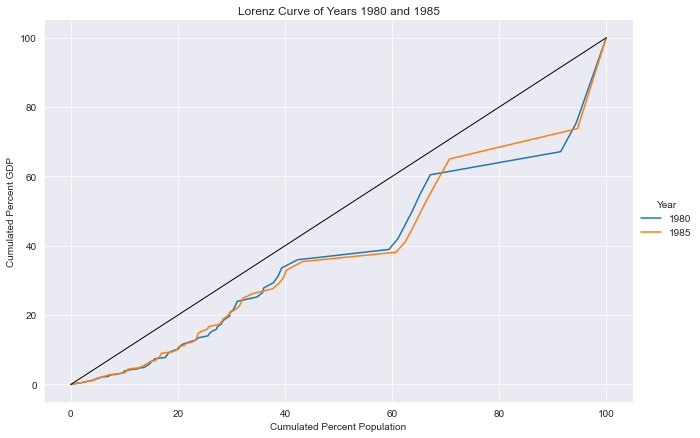

In [76]:
sns.set_style("darkgrid")
P=sns.FacetGrid(data=df_1980_1985, hue="Year",height=6,aspect=1.5, legend_out=True).map(sns.lineplot, "Cumulated Percent Population", "Cumulated Percent GDP")
P.add_legend()
plt.title('Lorenz Curve of Years 1980 and 1985')
plt.plot([0, 100], [0, 100], color = 'black', linewidth = 1)

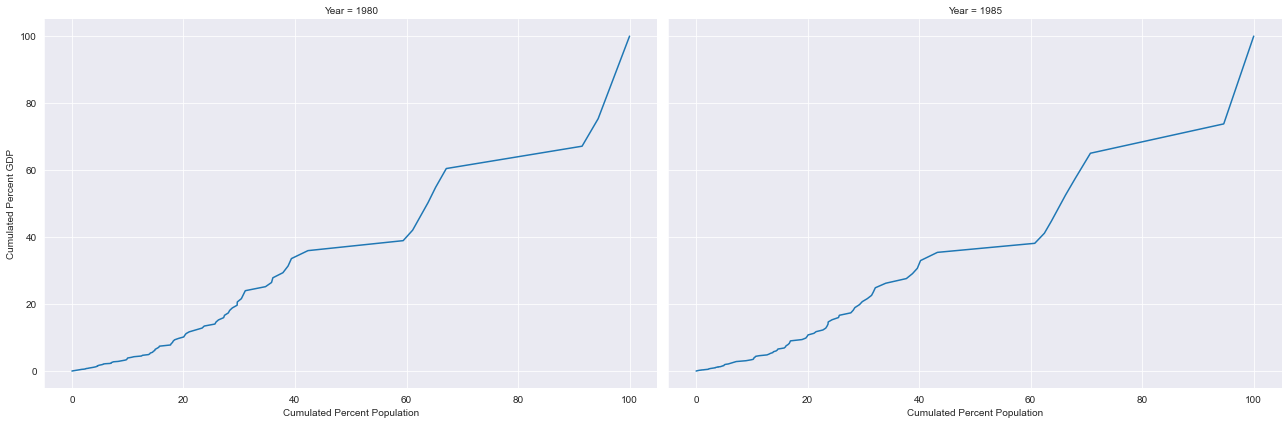

In [74]:
P=sns.FacetGrid(data=df_1980_1985, col="Year",height=6,aspect=1.5, legend_out=True).map(sns.lineplot, "Cumulated Percent Population", "Cumulated Percent GDP")